In [ ]:
%matplotlib inline
import math 
import copy
import numpy as np
import pandas as pd
from matplotlib import pylab as plt

In [ ]:
df = pd.DataFrame(
    {
        'x1': [1.5, 2, 3, 1.5, 0.5, -1, -2, -3, -1.5, 0],
        'x2': [1, 2.5, 3, -2, 2, -3, -1.2, -0.5, 2, -1.5],
        'label': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'],
        'label_index': [1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0]
     }
)
df

,x1,x2,label,label_index
0,1.5,1.0,A,1.0
1,2.0,2.5,A,1.0
2,3.0,3.0,A,1.0
3,1.5,-2.0,A,1.0
4,0.5,2.0,A,1.0
5,-1.0,-3.0,B,-1.0
6,-2.0,-1.2,B,-1.0
7,-3.0,-0.5,B,-1.0
8,-1.5,2.0,B,-1.0
9,0.0,-1.5,B,-1.0


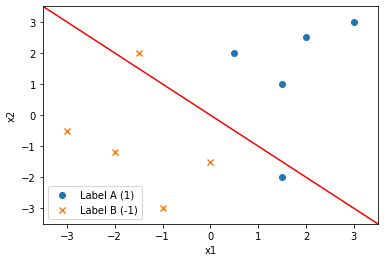

In [ ]:
label_a = df[df['label_index'] == 1]
plt.scatter(label_a['x1'], label_a['x2'], label='Label A (1)', marker='o')

label_b = df[df['label_index'] == -1]
plt.scatter(label_b['x1'], label_b['x2'], label='Label B (-1)', marker='x')

line_x = np.linspace(-4, 4, 4)
plt.plot(line_x, line_x * -1, 'r-')

plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim([-3.5, 3.5])
plt.ylim([-3.5, 3.5])
plt.legend()

## 識別関数

$$
y(x) = f(w^T \phi (x))
$$

In [ ]:
def discriminant(p, w):
  """
  :param: p: feature vector
  :param: w: coefficient vector
  """
  return np.dot(p, w)

## 活性化関数

$$
f(a) = \left\{\begin{matrix}
+1 (a \geq 0)\\
-1 (a \leq 0)
\end{matrix}\right.
$$

In [ ]:
def activate(x):
  """
  :param: x: discriminant result
  """
  if -1 < x:
    return 1
  else:
    return -1

In [ ]:
data_size = len(df.index)

x = np.array(df.loc[:, ['x1', 'x2']])
w = [1,1]
label_answer = np.array(df['label_index'])
output_test = np.zeros(data_size)
label_test = np.zeros(data_size)
result = np.zeros(data_size)

for i in range(data_size):
  output_test[i] = discriminant(x[i], w)
  label_test[i] = activate(output_test[i])
  result[i] = label_answer[i] == label_test[i]

df_test = copy.deepcopy(df)
df_test['discriminant value'] = output_test
df_test['prediction label'] = label_test
df_test['prediction flag'] = result
df_test

,x1,x2,label,label_index,discriminant value,prediction label,prediction flag
0,1.5,1.0,A,1.0,2.5,1.0,1.0
1,2.0,2.5,A,1.0,4.5,1.0,1.0
2,3.0,3.0,A,1.0,6.0,1.0,1.0
3,1.5,-2.0,A,1.0,-0.5,1.0,1.0
4,0.5,2.0,A,1.0,2.5,1.0,1.0
5,-1.0,-3.0,B,-1.0,-4.0,-1.0,1.0
6,-2.0,-1.2,B,-1.0,-3.2,-1.0,1.0
7,-3.0,-0.5,B,-1.0,-3.5,-1.0,1.0
8,-1.5,2.0,B,-1.0,0.5,1.0,0.0
9,0.0,-1.5,B,-1.0,-1.5,-1.0,1.0


## 誤差関数

$$
- \sum_{n \in M} w^t \phi (n) t(n)
$$

In [ ]:
error = 0

for i in range(data_size):
  if result[i] == 0:
    error -= output_test[i] * label_answer[i]

pd.DataFrame([[np.sum(result == 0), error]], columns=['Number of misclassifications', 'error'])

,Number of misclassifications,error
0,1,0.5


## パラメーターの更新

$$
w^{i+1} = w^{i} + \eta \phi (n) t(n)
$$

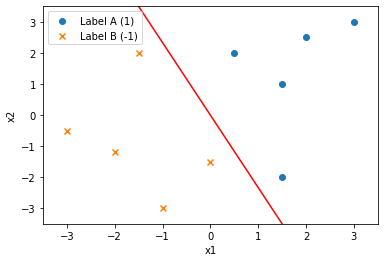

In [ ]:
eta = 0.1

max_iter = 100

for i in range(max_iter):
  output_test = np.zeros(data_size)
  label_test = np.zeros(data_size)
  result = np.zeros(data_size)

  for j in range(data_size):
    output_test[j] = discriminant(x[j], w)
    label_test[j] = activate(output_test[j])
    result[j] = label_answer[j] == label_test[j]
  
  error = 0

  for j in range(data_size):
    if result[j] == 0.0:
      error -= (output_test[j] * label_answer[j])
  
  miss_classification = np.sum(result == 0.0)

  if miss_classification == 0:
    break
  
  for j in np.random.permutation(np.arange(data_size)):
    if result[j] == 0.0:
      w += eta * x[j] * label_answer[j]
      break

plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim([-3.5, 3.5])
plt.ylim([-3.5, 3.5])

plt.scatter(label_a['x1'], label_a['x2'], label='Label A (1)', marker='o')
plt.scatter(label_b['x1'], label_b['x2'], label='Label B (-1)', marker='x')

line_x1 = np.linspace(-4, 4, 4)
plt.plot(line_x1, -1 * line_x1 * w[0] / w[1], 'r-')

plt.legend()